# 6.2 Develop a model

Once measure of progress is known, get started with *model development*.
- One step in the entire ML workflow.
- Not the most difficult one.
- Hardest is framing problems and data collection/annotation/cleaning.

## 6.2.1 Prepare the data

- DL models don't ingest raw data.
- Gotta make data more amenable to NNs.
- Includes techniques we'll discuss below, but many preprocessing techniques are domain-specific.

### Vectorization

- All inputs and targets must be *tensors* of floating-point data (or of strings or integers).
- First turn your data into tensors, called *data vectorization*.
- Examples: we used one-hot encoding in Reuters dataset, and multi-hot encoding in IMDB dataset.
- In house prediction and digits, it was already vectorized so we skipped it.

### Value normalization

- Not safe to fees an NN data that takes relatively large values (multi-digit integers, which might be larger than NN's initial weight values), or heterogeneous values (one feature ranges 0-1 and other 100-200).
- This can trigger large gradient updates, might cause network to not converge.
- Following characteristics to make learning easier:
  - *Take small values*: 0-1 range typically.
  - *Homogeneous*: all features should roughly have the same range.
- Some stricter normalization characteristics:
  - Normalize each feature independently to get a mean of 0.
  - Normalize each feature independently to get a st. dev. of 1. Easily done with NumPy arrays:
  ```python
  x -= x.mean(axis=0) # assuming x is a 2D data matrix of shape (samples, features)
  x /= x.std(axis=0)
  ```
  

### Handling missing values

- May sometmes have missing values in data.
- Could discard the feature entirely, but don't have to:
  - If feature is categorical, safe to create a new category "the value is missing". Model will automatically learn this.
  - If feature is numerical, avoid values like "0": might create dicontinuity in the latent space formed by your features -> make it harder for model to generalize.
  - Instead, consider replacing missing with average or median for the feature. Can also train a model to predict feature value given the values of other features.

NOTE: if expecting missing categorical features in test data, but model was trained on data without any missing values, model wouldn't have learned to ignore missing values. Should generate training samples artificially with missing entries: copy training examples several times, and drop some of the categorical features that you expect are likely to be missing from the test data.

## 6.2.2 Choose an evaluation protocol

- Purpose: achieve generalization.
- Development process will be guided by *validation metrics* that seek to measure generalization performance.
- Validation protocol's goal: accurately estimate the best success metric on actual production data. It's critical to building a useful model.

- *Maintaining a holdout validation set*: when plenty of data.
- *K-fold validation*: too few samples for holdout.
- *Iterated K-fold validation*: for highly accurate model evaluation when little data is available.

In most cases, 1 will work well enought. Be mindful of the *representativity* of your validation set. Don't have redundant samples between training and validation sets.

## 6.2.3 Beat a baseline

- When working on the model, the first goal is to achieve *statistical power*: develop a small model capable of beating some baseline.
- 3 things to focus on:
  1. *Feature engineering*: feature selection, possibly develop new features.
  2. *Selecting architecture priors*: densely connected? Convnet? RNN? Transformer? Is DL even a good approach?
  3. *Selecting a training configuration*: Which loss function? Batch size? Learning rate?

  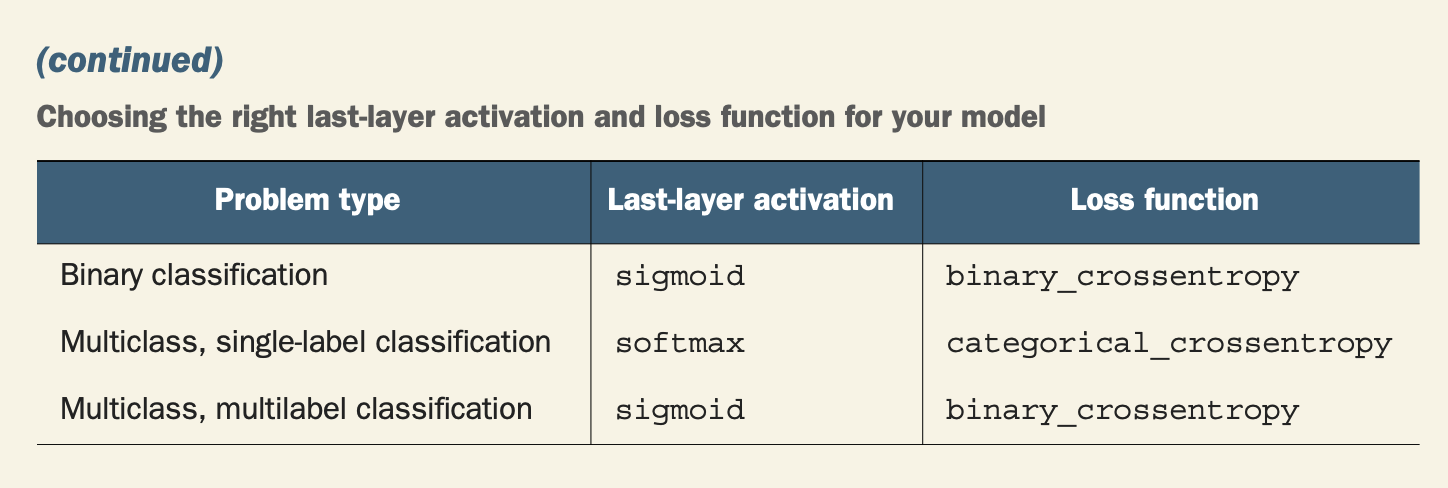

- For most problems, there exist templates you can start from.
  - Research prior art to identify feature engineering tech, model architectures that work best for your problem.
- Not always possible to achieve statistical power. If you can't beat the simple baseline, may be that the input data does not have the answer to the question your problem is asking.
- Remember your 2 hypotheses you are making:
  1. Outputs can be predicted given the inputs.
  2. Available data is sufficiently informative to learn the relationship between the inputs and the outputs.
- Possibly, the hypotheses are false, if so, it's time to go back to the black board.

## 6.2.4 Scale up: Develop a model that overfits

- Once we have a statistically powerful model (one that beats a baseline), next question: *is the model sufficiently powerful*?
- Does it have enough layers/neurons/parameters to model the problem at hand?
> Ideal model is one that stands right at the border between underfitting and overfitting, between undercapacity and overcapacity.
- To find the border, you must first cross it → to find how big of a model you need, first develop a model and overfits.
- Fairly easy (seen in last chapter):
  1. Add layers.
  2. Make layers bigger.
  3. Train for more # of epochs.
- When your model's performance on the validation data begins to go down, you have achieved overfitting.

## 6.2.5 Regularize and tune your model

- Once statistical power is achieved and we're able to overfit, next goal: *maximize generalization performance*.
- This step will take the most time: repeatedly modify, train evaluate on validation (not on test). Some things to try:
  1. Try different architectures: add/remove layers.
  2. Add dropout.
  3. If small model, try L1/L2 regu^n.
  4. Try different hyperparams (neurons or learning rate etc.) to find best config.
  5. Optionally, iterate on data curation or feature engineering: colelct and annotate more data, curate more/remove features.
- Can use *automated hyperparameter tuning software* like KerasTuner to automate this stuff.
> *Information leak*: everytime we take feedback from validation process to tune the model, we leak info. about the validation process into the model.
- For a few times, it's fine, but
done systematically for many iterations, our model will overfit to the validation process. This makes the eval^n process less reliable.

- Once we have a satisfactory model, we can train the final production model on the entire available data (training and validation) and then evaluate on the test set.
- If performance on test < performance on validation, then either:
  - The validation procedure was not reliable, or
  - We began overfiting to the validation data during tuning the params of the model.
    - In such case, may wanna switch to a more reliable eval^n protocol (like iterated K-fold validation).